In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utilities import consultar,pasar_a_DF,pasar_a_datetime
import os 
from datetime import datetime
#import pyodbc

In [3]:
# Change this path to run in your machine
home_path = 'C:/Users/54911/OneDrive/Documentos/git_repos/elecciones2023-arg'

In [4]:
os.chdir(home_path)

# Political parties

In [5]:
post_political = pd.read_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/Preparando_datos/publicaciones_politicas.csv')

Text(0.5, 1.0, 'Political posts')

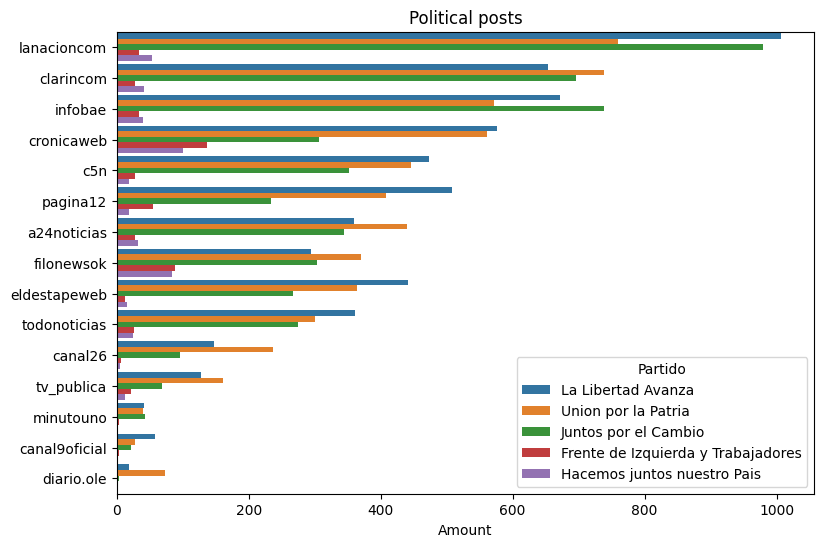

In [6]:
plt.figure(figsize=(9,6))
orden = post_political['fuente'].value_counts().index 
hue_orden = post_political['Partido'].value_counts().index 
sns.countplot(data=post_political, y = 'fuente',
              hue='Partido',
              order=orden,
              dodge=True,
              hue_order=hue_orden,
              width=0.9)
plt.ylabel('')
plt.xlabel('Amount')
plt.title('Political posts')


Text(0.5, 1.0, "Parties ' likes")

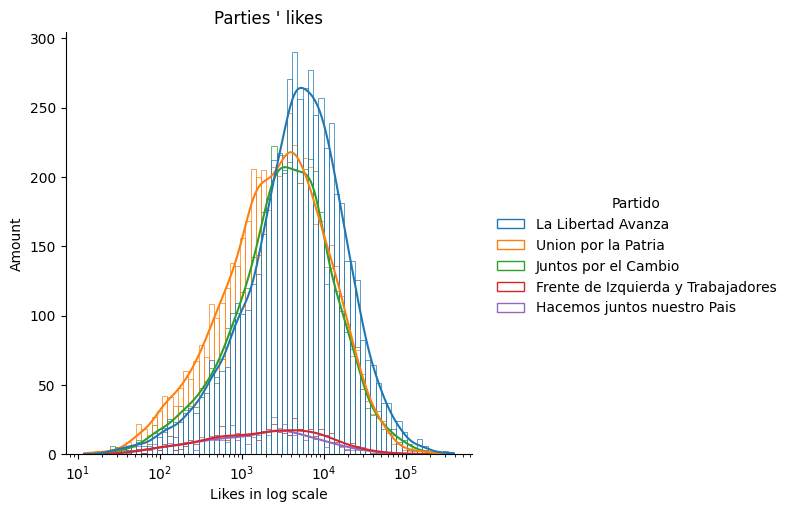

In [7]:
sns.displot(data=post_political,x='cantidad_likes',hue='Partido',
            kde=True,aspect=1, fill=False,log_scale=True)
plt.xlabel('Likes in log scale')
plt.ylabel('Amount')
plt.title('Parties \' likes')

In [8]:
post_political['fecha'] = post_political['fecha'].map(lambda x:pasar_a_datetime(x))

# Cantidad likes
Para una fuente en especifico

#REVISANDO ACTUALIZACIONES


In [9]:
df = pd.read_csv('Elecciones + IA/data_base/data_base_csv/Fuentes.csv')

In [10]:
df.sort_values(by='cant_publicaciones',inplace=True)

Text(0.5, 0, '')

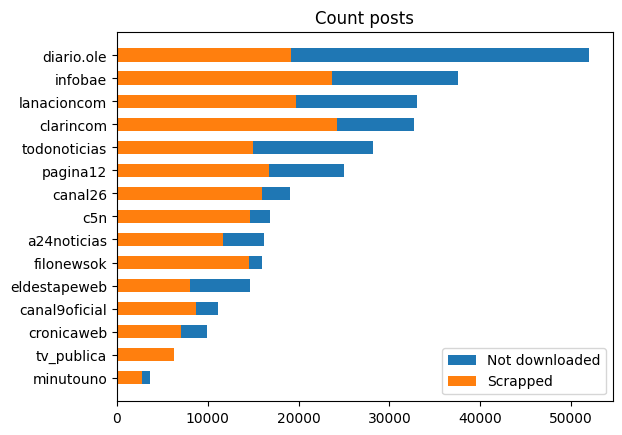

In [11]:
fuentes = df['nombre'].unique()
cant_publicaciones = {
    "Not downloaded": df['cant_publicaciones'].to_numpy(),
    "Scrapped": df['cant_recopilado'].to_numpy(),
}
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(15)

for boolean, pub in cant_publicaciones.items():
    p = ax.barh(fuentes, pub, width, label=boolean)
    bottom += pub

ax.set_title("Count posts")
ax.legend(loc="lower right")
ax.set_xlabel('')